In [2]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import collections
%matplotlib inline

In [3]:
path = glob.glob('../TrafficNet/TrafficNetToVolvo_Following/*.csv')

X_all = np.empty((1, 51))
Y_all = np.empty((1,))

for i in range(len(path)):
    print(i)
    
    Following = pd.read_csv(path[i], usecols=['LatitudeWsu','LongitudeWsu','GpsHeadingWsu','GpsSpeedWsu','SpeedWsu','AxWsu','Following','LaneDistanceLeft','LaneDistanceRight','LaneHeading','o1','o2','o3','o4','o5','o6','o7','r1','r2','r3','r4','r5','r6','r7','rr1','rr2','rr3','rr4','rr5','rr6','rr7','t1','t2','t3','t4','t5','t6','t7','tt1','tt2','tt3','tt4','tt5','tt6','tt7','c1','c2','c3','c4','c5','c6','c7'])
    
    Following.fillna(-1, inplace=True)
    
    Y_train = np.array(Following['Following'].values)
    X_train = np.array(Following[['LatitudeWsu','LongitudeWsu','GpsHeadingWsu','GpsSpeedWsu','SpeedWsu','AxWsu','LaneDistanceLeft','LaneDistanceRight','LaneHeading','o1','o2','o3','o4','o5','o6','o7','r1','r2','r3','r4','r5','r6','r7','rr1','rr2','rr3','rr4','rr5','rr6','rr7','t1','t2','t3','t4','t5','t6','t7','tt1','tt2','tt3','tt4','tt5','tt6','tt7','c1','c2','c3','c4','c5','c6','c7']])
             
    # Get dimensions of input and output
    #dimof_output = int(np.max(Y_train) + 1)
    dimof_output = 1
    dimof_input = X_train.shape[1]
             
    #print('dimof_input_train: ', dimof_input)
    #print('dimof_output_train: ', dimof_output)

    # Scale/whiten the X data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    #print(len(X_train))
    print(X_train.shape, Y_train.shape)
    
    # Set y as categorical data
    #Y_train = np_utils.to_categorical(Y_train, dimof_output)
    #print(len(Y_train))
    
    X_all = np.append(X_all, X_train, axis=0)
    Y_all = np.append(Y_all, Y_train, axis=0)

0
(19544, 51) (19544,)
1
(11740, 51) (11740,)
2
(11496, 51) (11496,)
3
(26081, 51) (26081,)
4
(29270, 51) (29270,)
5
(14507, 51) (14507,)
6
(15172, 51) (15172,)
7
(15276, 51) (15276,)
8
(14923, 51) (14923,)
9
(28756, 51) (28756,)
10
(14470, 51) (14470,)
11
(21603, 51) (21603,)
12
(11005, 51) (11005,)
13
(20745, 51) (20745,)
14
(14776, 51) (14776,)
15
(13823, 51) (13823,)
16
(13538, 51) (13538,)
17
(22155, 51) (22155,)
18
(21394, 51) (21394,)
19
(23821, 51) (23821,)
20
(18307, 51) (18307,)
21
(16944, 51) (16944,)
22
(23309, 51) (23309,)
23
(15579, 51) (15579,)
24
(22866, 51) (22866,)
25
(23109, 51) (23109,)
26
(16561, 51) (16561,)
27
(29807, 51) (29807,)
28
(24413, 51) (24413,)
29
(34055, 51) (34055,)
30
(15272, 51) (15272,)
31
(41559, 51) (41559,)
32
(21897, 51) (21897,)
33
(18440, 51) (18440,)
34
(21140, 51) (21140,)
35
(23049, 51) (23049,)
36
(26455, 51) (26455,)
37
(23781, 51) (23781,)
38
(23305, 51) (23305,)
39
(24190, 51) (24190,)
40
(17157, 51) (17157,)
41
(29288, 51) (29288,)
42

In [4]:
len(X_all)

1008375

In [5]:
X_all = X_all[1:1008375]
Y_all = Y_all[1:1008375]

# Feature selection

## ANOVA f-test Feature Selection

In [6]:
# example of anova f-test feature selection for numerical data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

In [7]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_classif, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [12 19 26 33 40 47] are constant.
  UserWarning)
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Feature 0: 1240.032795
Feature 1: 1962.256394
Feature 2: 2483.772948
Feature 3: 238.637894
Feature 4: 237.996339
Feature 5: 386.632996
Feature 6: 85.893797
Feature 7: 2.492610
Feature 8: 16589.311679
Feature 9: 62820.815588
Feature 10: 44030.190862
Feature 11: 13270.831872
Feature 12: nan
Feature 13: 8.274730
Feature 14: 3.961534
Feature 15: 4.009371
Feature 16: 2357.618440
Feature 17: 13984.231692
Feature 18: 8581.489682
Feature 19: nan
Feature 20: 5.028590
Feature 21: 5.290169
Feature 22: 2.982276
Feature 23: 22751.834253
Feature 24: 835.979496
Feature 25: 25.020051
Feature 26: nan
Feature 27: 0.207840
Feature 28: 0.686515
Feature 29: 0.642565
Feature 30: 11656.904805
Feature 31: 1410.160611
Feature 32: 837.242090
Feature 33: nan
Feature 34: 0.119012
Feature 35: 1.420079
Feature 36: 0.110184
Feature 37: 126812.945842
Feature 38: 63952.195963
Feature 39: 16406.799128
Feature 40: nan
Feature 41: 13.533430
Feature 42: 6.485062
Feature 43: 3.544253
Feature 44: 2406935.083669
Feature 45: 

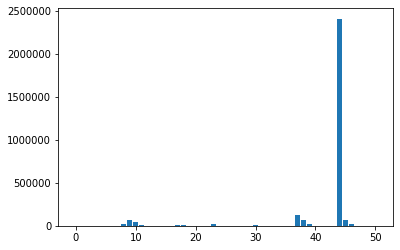

In [8]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_all, Y_all, test_size=0.5, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

# Modeling With Selected Features

## Model Built Using All Features

In [9]:
# evaluation of a model using all input features
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# split into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 100.00


## Model Built Using ANOVA f-test Features

In [10]:
# evaluation of a model using 4 features chosen with anova f-test
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# feature selection
def select_features_self(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=f_classif, k=6)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features_self(X_train, y_train, X_test)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat_anova = model.predict(X_test_fs)
# evaluate predictions
accuracy_anova = accuracy_score(y_test, yhat_anova)
print('Accuracy: %.2f' % (accuracy_anova*100))

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [12 19 26 33 40 47] are constant.
  UserWarning)
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Accuracy: 100.00


## Tune the Number of Selected Features

In [1]:
from pandas import read_csv
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import glob

In [4]:
path = glob.glob('../TrafficNet/TrafficNetToVolvo_Following/*.csv')

X_all = np.empty((1, 51))
Y_all = np.empty((1,))

for i in range(7):
    print(i)
    
    Following = pd.read_csv(path[i], usecols=['LatitudeWsu','LongitudeWsu','GpsHeadingWsu','GpsSpeedWsu','SpeedWsu','AxWsu','Following','LaneDistanceLeft','LaneDistanceRight','LaneHeading','o1','o2','o3','o4','o5','o6','o7','r1','r2','r3','r4','r5','r6','r7','rr1','rr2','rr3','rr4','rr5','rr6','rr7','t1','t2','t3','t4','t5','t6','t7','tt1','tt2','tt3','tt4','tt5','tt6','tt7','c1','c2','c3','c4','c5','c6','c7'])
    
    indexNames = Following[ (Following['Following'] != 0) & (Following['Following'] != 1) ].index
    #print(indexNames)
    Following.drop(indexNames , inplace=True)
    
    Following.fillna(-1, inplace=True)
    
    Y_train = np.array(Following['Following'].values)
    X_train = np.array(Following[['LatitudeWsu','LongitudeWsu','GpsHeadingWsu','GpsSpeedWsu','SpeedWsu','AxWsu','LaneDistanceLeft','LaneDistanceRight','LaneHeading','o1','o2','o3','o4','o5','o6','o7','r1','r2','r3','r4','r5','r6','r7','rr1','rr2','rr3','rr4','rr5','rr6','rr7','t1','t2','t3','t4','t5','t6','t7','tt1','tt2','tt3','tt4','tt5','tt6','tt7','c1','c2','c3','c4','c5','c6','c7']])
             
    # Get dimensions of input and output
    #dimof_output = int(np.max(Y_train) + 1)
    dimof_output = 1
    dimof_input = X_train.shape[1]
             
    #print('dimof_input_train: ', dimof_input)
    #print('dimof_output_train: ', dimof_output)

    # Scale/whiten the X data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    #print(len(X_train))
    print(X_train.shape, Y_train.shape)
    
    # Set y as categorical data
    #Y_train = np_utils.to_categorical(Y_train, dimof_output)
    #print(len(Y_train))
    
    X_all = np.append(X_all, X_train, axis=0)
    Y_all = np.append(Y_all, Y_train, axis=0)

0
(19544, 51) (19544,)
1
(11740, 51) (11740,)
2
(11496, 51) (11496,)
3
(26081, 51) (26081,)
4
(29270, 51) (29270,)
5
(14507, 51) (14507,)
6
(15172, 51) (15172,)


In [5]:
len(X_all)

127811

In [6]:
X_all = X_all[1:127811]
Y_all = Y_all[1:127811]

In [6]:
collections.Counter(Y_all)

Counter({0.0: 62800, 1.0: 65010})

In [15]:
# compare different numbers of features selected using anova f-test


# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# define the pipeline to evaluate
model = LogisticRegression(solver='liblinear')
fs = SelectKBest(score_func=f_classif)
pipeline = Pipeline(steps=[('anova',fs), ('lr', model)])
# define the grid
grid = dict()
grid['anova__k'] = [i+1 for i in range(X_all.shape[1])]
# define the grid search
search = GridSearchCV(pipeline, grid, scoring='accuracy', n_jobs=-1, cv=cv)
# perform the search
results = search.fit(X_all, Y_all)
# summarize best
print('Best Mean Accuracy: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)

Best Mean Accuracy: 1.000
Best Config: {'anova__k': 1}


/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [12 15 19 22 26 29 33 36 40 43 47 50] are constant.
  UserWarning)
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


>1 1.000 (0.000)
>2 1.000 (0.000)
>3 1.000 (0.000)
>4 1.000 (0.000)
>5 1.000 (0.000)
>6 1.000 (0.000)
>7 1.000 (0.000)
>8 1.000 (0.000)
>9 1.000 (0.000)
>10 1.000 (0.000)
>11 1.000 (0.000)
>12 1.000 (0.000)
>13 1.000 (0.000)
>14 1.000 (0.000)
>15 1.000 (0.000)
>16 1.000 (0.000)
>17 1.000 (0.000)
>18 1.000 (0.000)
>19 1.000 (0.000)
>20 1.000 (0.000)
>21 1.000 (0.000)
>22 1.000 (0.000)
>23 1.000 (0.000)
>24 1.000 (0.000)
>25 1.000 (0.000)
>26 1.000 (0.000)
>27 1.000 (0.000)
>28 1.000 (0.000)
>29 1.000 (0.000)
>30 1.000 (0.000)
>31 1.000 (0.000)
>32 1.000 (0.000)
>33 1.000 (0.000)
>34 1.000 (0.000)
>35 1.000 (0.000)
>36 1.000 (0.000)
>37 1.000 (0.000)
>38 1.000 (0.000)
>39 1.000 (0.000)
>40 1.000 (0.000)
>41 1.000 (0.000)
>42 1.000 (0.000)
>43 1.000 (0.000)
>44 1.000 (0.000)
>45 1.000 (0.000)
>46 1.000 (0.000)
>47 1.000 (0.000)
>48 1.000 (0.000)
>49 1.000 (0.000)
>50 1.000 (0.000)
>51 1.000 (0.000)


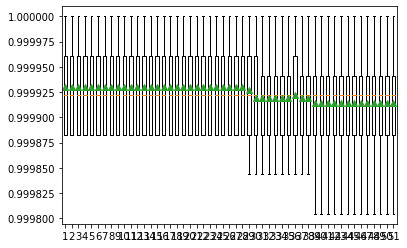

In [16]:
# compare different numbers of features selected using anova f-test


# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X_all, Y_all, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define number of features to evaluate
num_features = [i+1 for i in range(X_all.shape[1])]
# enumerate each number of features
results = list()
for k in num_features:
	# create pipeline
	model = LogisticRegression(solver='liblinear')
	fs = SelectKBest(score_func=f_classif, k=k)
	pipeline = Pipeline(steps=[('anova',fs), ('lr', model)])
	# evaluate the model
	scores = evaluate_model(pipeline)
	results.append(scores)
	# summarize the results
	print('>%d %.3f (%.3f)' % (k, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=num_features, showmeans=True)
pyplot.show()

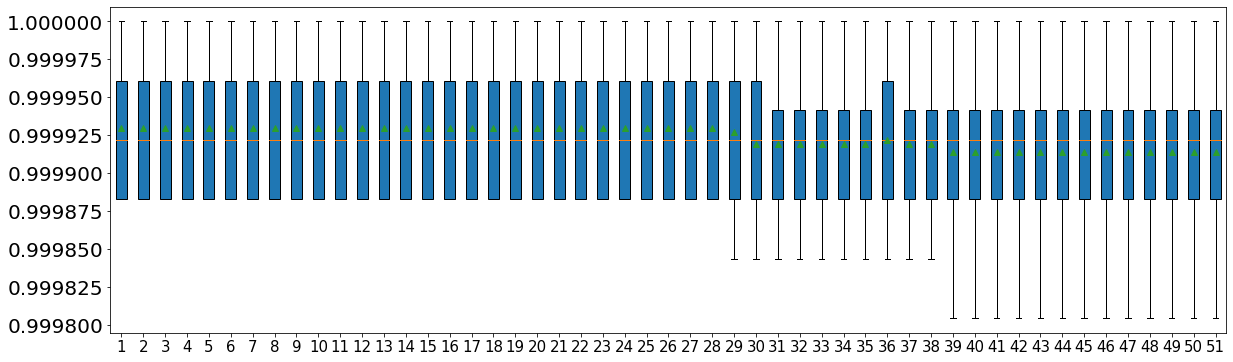

In [17]:
pyplot.figure(figsize=(20,6))
pyplot.boxplot(results, labels=num_features, showmeans=True, patch_artist=True)
pyplot.xticks(fontsize=15)
pyplot.yticks(fontsize=20)
pyplot.show()

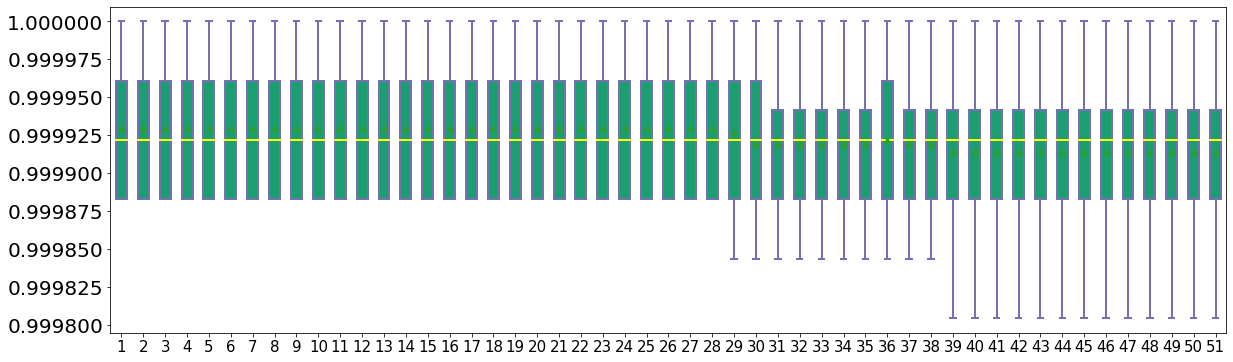

In [18]:
pyplot.figure(figsize=(20,6))
pyplot.xticks(fontsize=15)
pyplot.yticks(fontsize=20)

bp = pyplot.boxplot(results, labels=num_features, showmeans=True, patch_artist=True)
#ax = fig.add_subplot(111)
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e70' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='yellow', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

## the final 28 features

In [7]:
# feature selection
def select_features(X_train, y_train, X_test, n):
	# configure to select all features
	fs = SelectKBest(score_func=f_classif, k=n)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [12 15 19 22 26 29 33 36 40 43 47 50] are constant.
  UserWarning)
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Feature 0: 2678.144262
Feature 1: 55.261198
Feature 2: 2202.679688
Feature 3: 9.765581
Feature 4: 44.754948
Feature 5: 42.198041
Feature 6: 67.895223
Feature 7: 207.024132
Feature 8: 1042.697019
Feature 9: 6169.164083
Feature 10: 9753.097995
Feature 11: 2441.082707
Feature 12: nan
Feature 13: 1.947832
Feature 14: 0.615807
Feature 15: nan
Feature 16: 2007.795662
Feature 17: 3804.458407
Feature 18: 2271.108600
Feature 19: nan
Feature 20: 4.569960
Feature 21: 0.231104
Feature 22: nan
Feature 23: 2803.180535
Feature 24: 21.511862
Feature 25: 131.107015
Feature 26: nan
Feature 27: 4.620101
Feature 28: 1.557415
Feature 29: nan
Feature 30: 44.563087
Feature 31: 438.527480
Feature 32: 96.093730
Feature 33: nan
Feature 34: 0.265585
Feature 35: 0.319541
Feature 36: nan
Feature 37: 20207.009034
Feature 38: 12894.618628
Feature 39: 2959.200774
Feature 40: nan
Feature 41: 7.138875
Feature 42: 0.392084
Feature 43: nan
Feature 44: 265111.285893
Feature 45: 14814.254029
Feature 46: 3302.581259
Feature

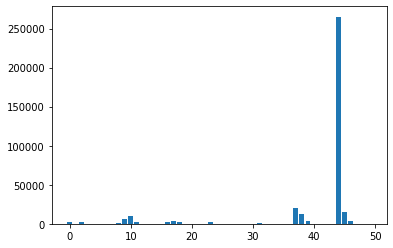

In [8]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_all, Y_all, test_size=0.5, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, 28)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [9]:
fs.get_support(indices=True)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 16, 17, 18, 23, 24,
       25, 30, 31, 32, 37, 38, 39, 41, 44, 45, 46])

1-12, 17-19, 24-26, 31-33, 39, 40, 42, 45-47
'LatitudeWsu','LongitudeWsu','GpsHeadingWsu','GpsSpeedWsu','SpeedWsu','AxWsu','LaneDistanceLeft','LaneDistanceRight','LaneHeading','o1','o2','o3','r1','r2','r3','rr1','rr2','rr3','t1','t2','t3','tt1','tt2','tt3','tt5','c1','c2','c3'


'LatitudeWsu','LongitudeWsu','GpsHeadingWsu','GpsSpeedWsu','SpeedWsu','AxWsu','LaneDistanceLeft','LaneDistanceRight','LaneHeading','o1','o2','o3',
'o4','o5','o6','o7',
'r1','r2','r3',
'r4','r5','r6','r7',
'rr1','rr2','rr3',
'rr4','rr5','rr6','rr7',
't1','t2','t3',
't4','t5','t6','t7','tt1',
'tt2','tt3','tt4','tt5','tt6','tt7','c1','c2','c3','c4','c5','c6','c7'        

# Train model

In [3]:
# Set up a 'look back' dataset for sequence to label prediction with Keras.

# The LSTM network expects the input data (X) to be provided with a specific
# array structure in the form of: [samples, time steps, features].

# create_dataset is adapted from
# http://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

def create_dataset(X, Y, **options):
    """Convert an array of X, Y values into a dataset matrix for and LSTM"""
    
    look_back = options.pop('look_back', None)
    dataX, dataY = [], []
    for i in range(len(X) - look_back):
        a = X[i:(i+look_back)]
        dataX.append(a)
        dataY.append(Y[i + look_back - 1])
    return np.array(dataX), np.array(dataY)

# Predictions will be based on look_back minutes of data:
look_back = 50

array([ 0,  2,  9, 10, 11, 16, 17, 18, 23, 37, 38, 39, 44, 45, 46])
   ['LatitudeWsu','GpsHeadingWsu','o1','o2','o3','r1','r2','r3','rr1','tt1','tt2','tt3','c1','c2','c3']
                       

In [3]:
path = glob.glob('../TrafficNet/TrafficNetToVolvo_Following/*.csv')

X_all = np.empty((1, 50, 28))
Y_all = np.empty((1,))

for i in range(41):
    print(i)
    
    Following = pd.read_csv(path[i], usecols=['LatitudeWsu','LongitudeWsu','GpsHeadingWsu','GpsSpeedWsu','SpeedWsu','AxWsu','LaneDistanceLeft','LaneDistanceRight','LaneHeading','Following','o1','o2','o3','r1','r2','r3','rr1','rr2','rr3','t1','t2','t3','tt1','tt2','tt3','tt5','c1','c2','c3'])
    #indexNames = Following[ (Following['Following'] != 0) & (Following['Following'] != 1) ].index
    #print(indexNames)
    #Following.drop(indexNames , inplace=True)
    
    Following.fillna(-1, inplace=True)
    
    Y_train = np.array(Following['Following'].values)
    X_train = np.array(Following[['LatitudeWsu','LongitudeWsu','GpsHeadingWsu','GpsSpeedWsu','SpeedWsu','AxWsu','LaneDistanceLeft','LaneDistanceRight','LaneHeading','o1','o2','o3','r1','r2','r3','rr1','rr2','rr3','t1','t2','t3','tt1','tt2','tt3','tt5','c1','c2','c3']])
    # Get dimensions of input and output
    #dimof_output = int(np.max(Y_train) + 1)
    dimof_output = 1
    dimof_input = X_train.shape[1]
             
    # Scale/whiten the X data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    #print(len(X_train))
    print(X_train.shape, Y_train.shape)
    
    # Set y as categorical data
    #Y_train = np_utils.to_categorical(Y_train, dimof_output)
    #print(len(Y_train))
    
    X, Y = create_dataset(X_train, Y_train, look_back=look_back)
    print(X.shape, Y.shape)
    
    X_all = np.append(X_all, X, axis=0)
    Y_all = np.append(Y_all, Y, axis=0)

0
(19544, 28) (19544,)
(19494, 50, 28) (19494,)
1
(11740, 28) (11740,)
(11690, 50, 28) (11690,)
2
(11496, 28) (11496,)
(11446, 50, 28) (11446,)
3
(26081, 28) (26081,)
(26031, 50, 28) (26031,)
4
(14507, 28) (14507,)
(14457, 50, 28) (14457,)
5
(15172, 28) (15172,)
(15122, 50, 28) (15122,)
6
(15276, 28) (15276,)
(15226, 50, 28) (15226,)
7
(14923, 28) (14923,)
(14873, 50, 28) (14873,)
8
(28756, 28) (28756,)
(28706, 50, 28) (28706,)
9
(14470, 28) (14470,)
(14420, 50, 28) (14420,)
10
(21603, 28) (21603,)
(21553, 50, 28) (21553,)
11
(11005, 28) (11005,)
(10955, 50, 28) (10955,)
12
(20745, 28) (20745,)
(20695, 50, 28) (20695,)
13
(14776, 28) (14776,)
(14726, 50, 28) (14726,)
14
(13823, 28) (13823,)
(13773, 50, 28) (13773,)
15
(13538, 28) (13538,)
(13488, 50, 28) (13488,)
16
(22155, 28) (22155,)
(22105, 50, 28) (22105,)
17
(21394, 28) (21394,)
(21344, 50, 28) (21344,)
18
(23821, 28) (23821,)
(23771, 50, 28) (23771,)
19
(18307, 28) (18307,)
(18257, 50, 28) (18257,)
20
(16944, 28) (16944,)
(16894

In [5]:
(len(X_all)//64)*64 + 1

843201

In [4]:
X_all = X_all[1:843201]
Y_all = Y_all[1:843201]

collections.Counter(Y_all)

Counter({0.0: 424572, 1.0: 418628})

In [7]:
436577/(436577+435871)
424572/418628

1.0141987635800758

In [5]:
# Create the LSTM network.
batch_size = 32
dropout = 0.5
num_epoch = 100
earlyStopping = EarlyStopping(monitor='val_loss', patience=0, verbose=0, mode='auto')
weights = {0:1, 1:1}

In [6]:
Following1 = Sequential()
Following1.add(LSTM(output_dim=10, batch_input_shape=[batch_size, look_back, dimof_input]))
Following1.add(Dropout(dropout))
Following1.add(Dense(dimof_output, init='uniform', activation='sigmoid'))
Following1.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=[32, 50, 2..., units=10)`
  
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  after removing the cwd from sys.path.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
Following1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (32, 10)                  1560      
_________________________________________________________________
dropout_1 (Dropout)          (32, 10)                  0         
_________________________________________________________________
dense_1 (Dense)              (32, 1)                   11        
Total params: 1,571
Trainable params: 1,571
Non-trainable params: 0
_________________________________________________________________


In [7]:
history1 = Following1.fit(
    X_all, Y_all,
    validation_split=0.5,
    callbacks=[earlyStopping],
    shuffle=True,
    nb_epoch=num_epoch, batch_size=batch_size, verbose=1)

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  



Train on 421600 samples, validate on 421600 samples
Epoch 1/100
421600/421600 [==============================] - 2024s 5ms/step - loss: 0.0305 - accuracy: 0.9924 - val_loss: 4.5271e-04 - val_accuracy: 0.9998
Epoch 2/100
421600/421600 [==============================] - 2210s 5ms/step - loss: 0.0022 - accuracy: 0.9993 - val_loss: 1.6473e-04 - val_accuracy: 1.0000
Epoch 3/100
421600/421600 [==============================] - 2259s 5ms/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 1.5591e-04 - val_accuracy: 1.0000
Epoch 4/100
421600/421600 [==============================] - 2357s 6ms/step - loss: 0.0016 - accuracy: 0.9994 - val_loss: 2.6898e-04 - val_accuracy: 0.9999


In [8]:
history1.history

{'val_loss': [0.00045270545071073606,
  0.00016472569935435872,
  0.0001559061244378731,
  0.0002689772372401061],
 'val_accuracy': [0.9998458027839661,
  0.9999691843986511,
  0.9999786615371704,
  0.9999454617500305],
 'loss': [0.030459760662286783,
  0.0021967290413353623,
  0.00182361107488103,
  0.0015568573932573943],
 'accuracy': [0.9924004, 0.9993359, 0.99935246, 0.99938565]}

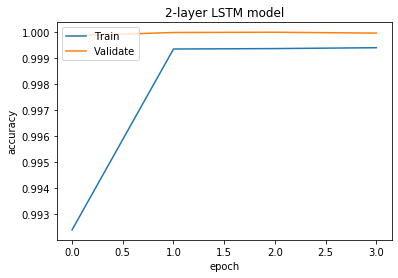

In [9]:
# Plot history for training and validation loss.

plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('2-layer LSTM model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

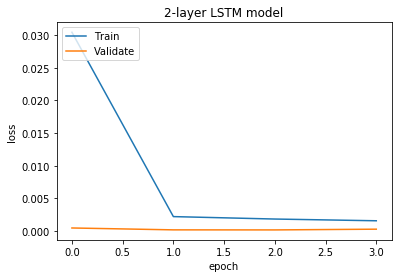

In [10]:
# Plot history for training and validation loss.

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('2-layer LSTM model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [15]:
Following2 = Sequential()
Following2.add(LSTM(output_dim=10, batch_input_shape=[batch_size, look_back, dimof_input]))
Following2.add(Dropout(dropout))
Following2.add(Dense(30, activation='relu'))
Following2.add(Dropout(dropout))
Following2.add(Dense(dimof_output, init='uniform', activation='sigmoid'))
Following2.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=[32, 50, 2..., units=10)`
  
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  


In [25]:
model_Flow2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (32, 10)                  1040      
_________________________________________________________________
dropout_3 (Dropout)          (32, 10)                  0         
_________________________________________________________________
dense_3 (Dense)              (32, 30)                  330       
_________________________________________________________________
dropout_4 (Dropout)          (32, 30)                  0         
_________________________________________________________________
dense_4 (Dense)              (32, 1)                   31        
Total params: 1,401
Trainable params: 1,401
Non-trainable params: 0
_________________________________________________________________


In [16]:
history2 = Following2.fit(
    X_all, Y_all,
    validation_split=0.5,
    callbacks=[earlyStopping],
    shuffle=True,
    nb_epoch=num_epoch, batch_size=batch_size, verbose=1)

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 421600 samples, validate on 421600 samples
Epoch 1/100
421600/421600 [==============================] - 2646s 6ms/step - loss: 0.0271 - accuracy: 0.9910 - val_loss: 2.1645e-04 - val_accuracy: 1.0000
Epoch 2/100
421600/421600 [==============================] - 2710s 6ms/step - loss: 0.0032 - accuracy: 0.9993 - val_loss: 2.0643e-04 - val_accuracy: 1.0000
Epoch 3/100
421600/421600 [==============================] - 2832s 7ms/step - loss: 0.0025 - accuracy: 0.9993 - val_loss: 2.6082e-04 - val_accuracy: 1.0000


In [17]:
history2.history

{'val_loss': [0.00021644713507688903,
  0.00020643173054967403,
  0.0002608227588275683],
 'val_accuracy': [0.9999668002128601, 0.9999715089797974, 0.9999644160270691],
 'loss': [0.027147338102533735, 0.003157763367803798, 0.00250208314072072],
 'accuracy': [0.9910152, 0.99925524, 0.99929315]}

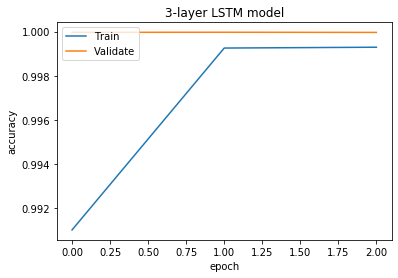

In [18]:
# Plot history for training and validation loss.

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('3-layer LSTM model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

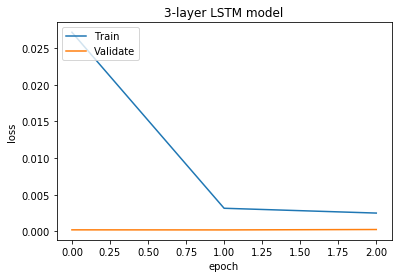

In [19]:
# Plot history for training and validation loss.

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('3-layer LSTM model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [6]:
Following3 = Sequential()
Following3.add(LSTM(output_dim=10, batch_input_shape=[batch_size, look_back, dimof_input]))
Following3.add(Dropout(dropout))
Following3.add(Dense(30, activation='relu'))
Following3.add(Dropout(dropout))
Following3.add(Dense(30, activation='relu'))
Following3.add(Dropout(dropout))
Following3.add(Dense(dimof_output, init='uniform', activation='sigmoid'))
Following3.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=[32, 50, 2..., units=10)`
  


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  


In [21]:
Following3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (32, 10)                  1560      
_________________________________________________________________
dropout_4 (Dropout)          (32, 10)                  0         
_________________________________________________________________
dense_4 (Dense)              (32, 30)                  330       
_________________________________________________________________
dropout_5 (Dropout)          (32, 30)                  0         
_________________________________________________________________
dense_5 (Dense)              (32, 30)                  930       
_________________________________________________________________
dropout_6 (Dropout)          (32, 30)                  0         
_________________________________________________________________
dense_6 (Dense)              (32, 1)                  

In [7]:
history3 = Following3.fit(
    X_all, Y_all,
    validation_split=0.5,
    callbacks=[earlyStopping],
    shuffle=True,
    nb_epoch=num_epoch, batch_size=batch_size, verbose=1)

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  



Train on 421600 samples, validate on 421600 samples
Epoch 1/100
421600/421600 [==============================] - 1975s 5ms/step - loss: 0.0275 - accuracy: 0.9911 - val_loss: 3.4957e-04 - val_accuracy: 1.0000
Epoch 2/100
421600/421600 [==============================] - 2116s 5ms/step - loss: 0.0034 - accuracy: 0.9992 - val_loss: 3.7169e-04 - val_accuracy: 1.0000


In [8]:
history3.history

{'val_loss': [0.00034956731816516615, 0.00037168658596329154],
 'val_accuracy': [0.9999501705169678, 0.9999738931655884],
 'loss': [0.027537829565766867, 0.003382818227419228],
 'accuracy': [0.9911243, 0.99919355]}

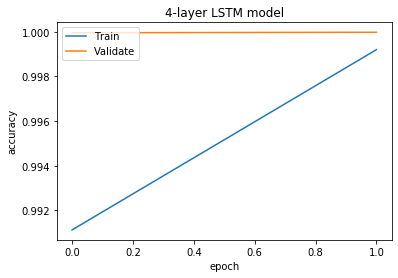

In [9]:
# Plot history for training and validation loss.

plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('4-layer LSTM model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

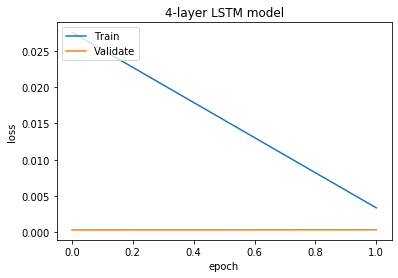

In [10]:
# Plot history for training and validation loss.

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('4-layer LSTM model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [11]:
Following4 = Sequential()
Following4.add(LSTM(output_dim=10, batch_input_shape=[batch_size, look_back, dimof_input]))
Following4.add(Dropout(dropout))
Following4.add(Dense(30, activation='relu'))
Following4.add(Dropout(dropout))
Following4.add(Dense(30, activation='relu'))
Following4.add(Dropout(dropout))
Following4.add(Dense(10, activation='relu'))
Following4.add(Dropout(dropout))
Following4.add(Dense(dimof_output, init='uniform', activation='sigmoid'))
Following4.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=[32, 50, 2..., units=10)`
  
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.


In [12]:
Following4.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (32, 10)                  1560      
_________________________________________________________________
dropout_4 (Dropout)          (32, 10)                  0         
_________________________________________________________________
dense_4 (Dense)              (32, 30)                  330       
_________________________________________________________________
dropout_5 (Dropout)          (32, 30)                  0         
_________________________________________________________________
dense_5 (Dense)              (32, 30)                  930       
_________________________________________________________________
dropout_6 (Dropout)          (32, 30)                  0         
_________________________________________________________________
dense_6 (Dense)              (32, 10)                 

In [13]:
history4 = Following4.fit(
    X_all, Y_all,
    validation_split=0.5,
    callbacks=[earlyStopping],
    shuffle=True,
    nb_epoch=num_epoch, batch_size=batch_size, verbose=1)

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 421600 samples, validate on 421600 samples
Epoch 1/100
421600/421600 [==============================] - 2291s 5ms/step - loss: 0.0558 - accuracy: 0.9791 - val_loss: 0.0011 - val_accuracy: 0.9999
Epoch 2/100
421600/421600 [==============================] - 2414s 6ms/step - loss: 0.0248 - accuracy: 0.9914 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 3/100
421600/421600 [==============================] - 2489s 6ms/step - loss: 0.0248 - accuracy: 0.9915 - val_loss: 6.7765e-04 - val_accuracy: 1.0000
Epoch 4/100
421600/421600 [==============================] - 2606s 6ms/step - loss: 0.0239 - accuracy: 0.9918 - val_loss: 0.0010 - val_accuracy: 1.0000


In [14]:
history4.history

{'val_loss': [0.0011215364523811868,
  0.001060938165146462,
  0.0006776546396136351,
  0.0010393021618715025],
 'val_accuracy': [0.9998980164527893,
  0.9999501705169678,
  0.9999596476554871,
  0.9999549388885498],
 'loss': [0.055800721002230734,
  0.02483841040495747,
  0.024836125998088637,
  0.023917891630339444],
 'accuracy': [0.9790726, 0.99141127, 0.9914682, 0.99180263]}

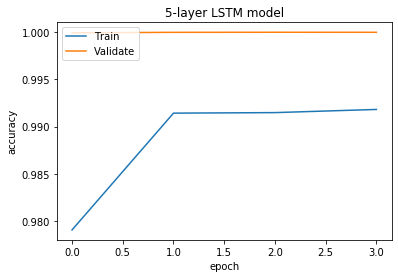

In [15]:
# Plot history for training and validation loss.

plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('5-layer LSTM model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

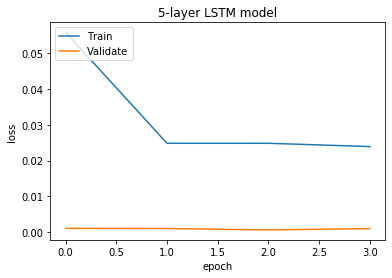

In [16]:
# Plot history for training and validation loss.

plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('5-layer LSTM model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [27]:
model_Flow5 = Sequential()
model_Flow5.add(LSTM(output_dim=20, batch_input_shape=[batch_size, look_back, dimof_input]))
model_Flow5.add(Dropout(dropout))
model_Flow5.add(Dense(40, activation='relu'))
model_Flow5.add(Dropout(dropout))
model_Flow5.add(Dense(dimof_output, init='uniform', activation='sigmoid'))
model_Flow5.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=[32, 50, 2..., units=20)`
  
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  


In [28]:
model_Flow5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (32, 20)                  3440      
_________________________________________________________________
dropout_10 (Dropout)         (32, 20)                  0         
_________________________________________________________________
dense_10 (Dense)             (32, 40)                  840       
_________________________________________________________________
dropout_11 (Dropout)         (32, 40)                  0         
_________________________________________________________________
dense_11 (Dense)             (32, 1)                   41        
Total params: 4,321
Trainable params: 4,321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history5 = model_Flow5.fit(
    X_all, Y_all,
    validation_split=0.5,
    callbacks=[earlyStopping],
    shuffle=True,
    nb_epoch=num_epoch, batch_size=batch_size, verbose=1)

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 439072 samples, validate on 439072 samples
Epoch 1/100
322080/439072 [=====================>........] - ETA: 9:52 - loss: 0.2482 - accuracy: 0.8948

In [ ]:
history5.history

In [ ]:
# Plot history for training and validation loss.

plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('model accuracy with replacing missing data')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [ ]:
# Plot history for training and validation loss.

plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss with replacing missing data')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

## Save 

In [11]:
model_json2 = Following1.to_json()
with open("FollowingNet1.json", "w") as json_file:
    json_file.write(model_json2)
    
# serialize weights to HDF5
Following1.save_weights("FollowingNet1_weights.h5")
print("Saved model to disk")

#model_Flow1.save("TrafficNetToVolvo_FlowMaskingSparse-1.h5")
Following1.save("FollowingNet1.h5")
print("Saved model to disk")

Saved model to disk
Saved model to disk


In [1]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model

# load model
model = load_model('FollowingNet1.h5')

Using TensorFlow backend.
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/jocelyn/opt/anaconda3/lib/pytho

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



In [4]:
Net = pd.read_csv('../TrafficNet/VolvoData/CutIn38.csv', usecols=['LatitudeWsu','LongitudeWsu','GpsHeadingWsu','GpsSpeedWsu','SpeedWsu','AxWsu','LaneDistanceLeft','LaneDistanceRight','LaneHeading','Following','o1','o2','o3','r1','r2','r3','rr1','rr2','rr3','t1','t2','t3','tt1','tt2','tt3','tt5','c1','c2','c3'])
Net.head()

,LatitudeWsu,LongitudeWsu,GpsHeadingWsu,GpsSpeedWsu,SpeedWsu,AxWsu,Following,LaneDistanceLeft,LaneDistanceRight,LaneHeading,...,t1,t2,t3,tt1,tt2,tt3,tt5,c1,c2,c3
0,42.31,-83.708,184.49,14.838,52.891,0.16930,0,-3.4766,0.34375,-1.024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,42.31,-83.708,184.70,14.869,53.415,0.31886,0,-3.5938,0.38281,-1.024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,42.31,-83.708,184.93,14.753,53.530,0.31886,0,-3.6523,0.48828,-1.024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,42.31,-83.708,185.16,14.765,53.110,0.11789,0,-3.7148,0.55469,-1.024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,42.31,-83.708,185.24,14.798,53.152,0.11789,0,-3.7734,0.62500,-1.024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
Net.fillna(-1, inplace=True)

YNet = np.array(Net['Following'].values)
XNet = np.array(Net[['LatitudeWsu','LongitudeWsu','GpsHeadingWsu','GpsSpeedWsu','SpeedWsu','AxWsu','LaneDistanceLeft','LaneDistanceRight','LaneHeading','o1','o2','o3','r1','r2','r3','rr1','rr2','rr3','t1','t2','t3','tt1','tt2','tt3','tt5','c1','c2','c3']])
    
# Scale/whiten the X data
scaler = StandardScaler()
X_Net = scaler.fit_transform(XNet)
XP_Net, YP_Net = create_dataset(X_Net, YNet, look_back=look_back)

(len(XP_Net)//64)*64

XPP_Net = XP_Net[:14080]
YPP_Net = YP_Net[:14080]

In [8]:
from datetime import datetime
start=datetime.now()
Y_predict_Net = model.predict_classes(XPP_Net, verbose=True)
print(datetime.now()-start)

#equal_arrays_volvo = (Y_predict_volvo == YPP_volvo).all(axis=1)
#acc_volvo = np.count_nonzero(equal_arrays_volvo == True)/len(equal_arrays_volvo)
a = Y_predict_Net.tolist()
a2 = [item[0] for item in a]
b = YPP_Net.tolist()
equal_arrays_Net = [i for i, (x, y) in enumerate(zip(a2, b)) if x == y]
acc_Net = len(equal_arrays_Net)/len(a2)
print(acc_Net)

14080/14080 [==============================] - 8s 581us/step
0:00:08.182282
0.9845170454545454


In [9]:
f = open("predict_FollowingNet1_Net.csv", "w")

for index in range(len(a2)):
    f.write(str(a2[index]) + "," + str(b[index]) + "\n")
f.close()

## serialize model to JSON
https://machinelearningmastery.com/save-load-keras-deep-learning-models/

In [13]:
model_json2 = model_Flow2.to_json()
with open("1DY_FlowReplacingSparse-1.json", "w") as json_file:
    json_file.write(model_json2)
    
# serialize weights to HDF5
model_Flow2.save_weights("1DY_weights_FlowReplacingSparse-1.h5")
print("Saved model to disk")

Saved model to disk


## Save Model Weights and Architecture Together

In [14]:
#model_Flow1.save("TrafficNetToVolvo_FlowMaskingSparse-1.h5")
model_Flow2.save("1DY_FlowReplacingSparse-1.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model

# load model
model = load_model('model.h5')
# summarize model.
model.summary()
# load dataset
dataset = loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# evaluate the model
score = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

In [ ]:
# Write predictions to disk

data1988.to_csv("TrafficNetToVolvo-6.1-CutIn-Masking_PredictionResult.csv", encoding='utf_8_sig', index=False)